# Supervised Machine Learning: Regresion
### This scripts has the following:
#### 1. Importing libraries & data
#### 2. Data cleaning
#### 3. Data preparation for regression
#### 4. Regression analysis

### 1. Importing libraries & data

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# This comand ensures the charts are displayed in the notebook without the need to "call" them.

%matplotlib inline

In [28]:
#define path for superstore_project
path = r'C:/users/localadmin/global_superstore_project'

In [31]:
#importing procesed superstore data as gs_store
gs_store = pd.read_csv(os.path.join(path,'Data', 'processed_data', 'superstore_cleaned.csv'))

### 2. Data cleaning

In [36]:
#checking the dataframe's shape
gs_store.head()

,Unnamed: 0,product_category,city,country,customer_id,customer_name,discount,market,order_date,order_id,...,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,year,market2,week_num
0,0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,00:00.0,CA-2011-130813,...,19,Consumer,00:00.0,Second Class,4.37,California,Paper,2011,North America,2
1,1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,00:00.0,CA-2011-148614,...,19,Consumer,00:00.0,Standard Class,0.94,California,Paper,2011,North America,4
2,2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,00:00.0,CA-2011-118962,...,21,Consumer,00:00.0,Standard Class,1.81,California,Paper,2011,North America,32
3,3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,00:00.0,CA-2011-118962,...,111,Consumer,00:00.0,Standard Class,4.59,California,Paper,2011,North America,32
4,4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,00:00.0,CA-2011-146969,...,6,Consumer,00:00.0,Standard Class,1.32,California,Paper,2011,North America,40


In [38]:
#checking the dataframe's shape
gs_store.shape

(51290, 27)

In [41]:
# Checking the dataframe's columns
gs_store.columns

Index(['Unnamed: 0', 'product_category', 'city', 'country', 'customer_id',
       'customer_name', 'discount', 'market', 'order_date', 'order_id',
       'order_priority', 'product_id', 'product_name', 'profit', 'quantity',
       'region', 'row_id', 'sales', 'segment', 'ship_date', 'ship_mode',
       'shipping_cost', 'state', 'sub_category', 'year', 'market2',
       'week_num'],
      dtype='object')

In [48]:
# Check for missing values
gs_store.isnull().sum() #no missing values

Unnamed: 0          0
product_category    0
city                0
country             0
customer_id         0
customer_name       0
discount            0
market              0
order_date          0
order_id            0
order_priority      0
product_id          0
product_name        0
profit              0
quantity            0
region              0
row_id              0
sales               0
segment             0
ship_date           0
ship_mode           0
shipping_cost       0
state               0
sub_category        0
year                0
market2             0
week_num            0
dtype: int64

In [53]:
# Check for empty strings (which are sometimes used to represent missing values)
(gs_store == '').sum() # no empty strings

Unnamed: 0          0
product_category    0
city                0
country             0
customer_id         0
customer_name       0
discount            0
market              0
order_date          0
order_id            0
order_priority      0
product_id          0
product_name        0
profit              0
quantity            0
region              0
row_id              0
sales               0
segment             0
ship_date           0
ship_mode           0
shipping_cost       0
state               0
sub_category        0
year                0
market2             0
week_num            0
dtype: int64

In [56]:
# Check for duplicates
dups = gs_store.duplicated()
dups.shape
#no duplicates

(51290,)

In [89]:
#checking for outliers by seeing the distribution of min, mean, max for sales and profit
summary_stats = gs_store[['sales', 'profit']].describe()
#calling out summary_stats for sales ands profit
summary_stats

,sales,profit
count,51290.000000,51290.000000
mean,246.498440,28.610982
std,487.567175,174.340972
min,0.000000,-6599.978000
25%,31.000000,0.000000
50%,85.000000,9.240000
75%,251.000000,36.810000
max,22638.000000,8399.976000


The distribution of min, mean, and max for the 2 variables show that the data has outliers. This is further buttressed by the medians of the variables shown hereunder.

In [106]:
# checking the medians for sales and profit
gs_store['sales'].median()

85.0

In [108]:
gs_store['profit'].median()

9.24

C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_15580\4163487146.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gs_store['profit'], bins=25)


<Axes: xlabel='profit', ylabel='Density'>

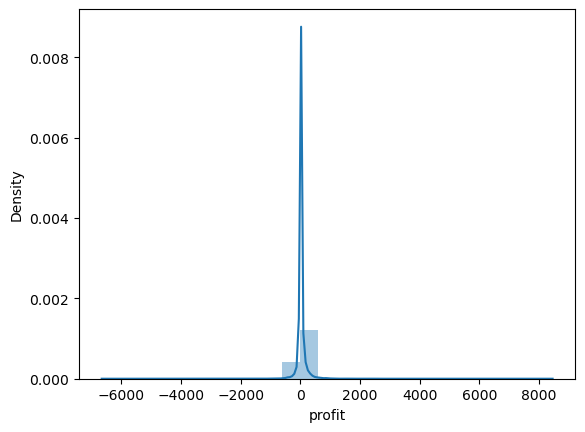

In [64]:
#checking for outliers for profit data
sns.distplot(gs_store['profit'], bins=25)

The profit data has outliers. However, regression shall proceed without removal of outliers and see if r-squared is significant or not.

C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_15580\3603934214.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gs_store['sales'], bins=25)


<Axes: xlabel='sales', ylabel='Density'>

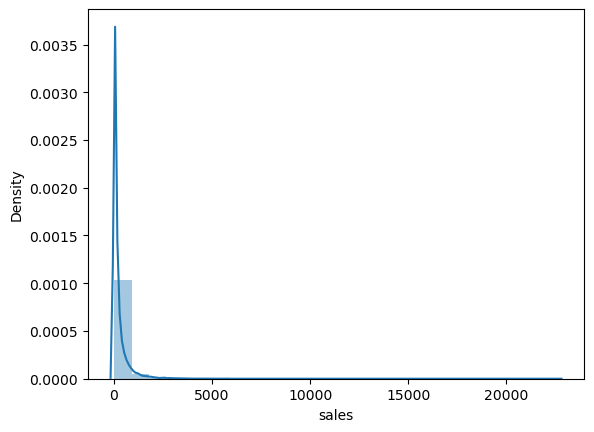

In [68]:
#checking outliers for sales data
sns.distplot(gs_store['sales'], bins=25)

The profit data has outliers. However, the regression shall proceed without removing the outliers and see if the regression is significant.

#### Hypothesis: As sales increase, the profit for global superstore also increases

### 3. Data Prep for Regrssion

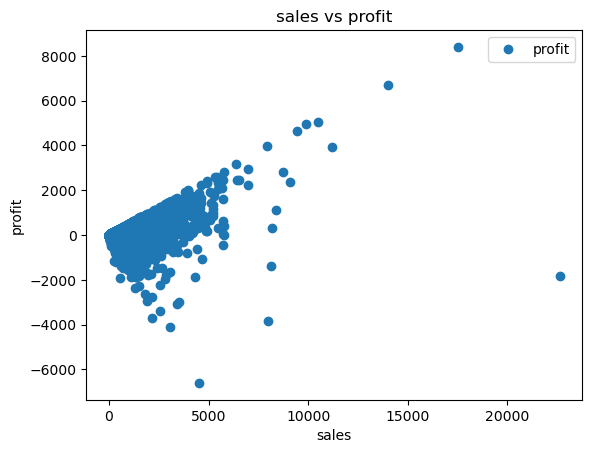

In [95]:
#checking how the scatter plot looks
gs_store.plot(x = 'sales', y='profit',style='o') # The style option creates a scatterplot.
plt.title('sales vs profit')  
plt.xlabel('sales')  
plt.ylabel('profit')  
plt.show()

The scatter plot shows that there are outliers althought there seemingly is a positive relationship between sales and profits.

In [113]:
# Reshaping sales and profit date into NumPy arrays and put them into separate objects.

X = gs_store['sales'].values.reshape(-1,1)
y = gs_store['profit'].values.reshape(-1,1)

In [116]:
X

array([[ 19],
       [ 19],
       [ 21],
       ...,
       [ 12],
       [ 90],
       [154]], dtype=int64)

In [120]:
y

array([[ 9.3312],
       [ 9.2928],
       [ 9.8418],
       ...,
       [ 4.2804],
       [33.93  ],
       [51.8238]])

In [124]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [131]:
# Create a regression object - this is used to fit the object onto the training set
regression = LinearRegression()

In [134]:
# Fitting the regression object onto the training set (X and y).
regression.fit(X_train, y_train)

LinearRegression()

In [138]:
# Predicting y using X.
y_predicted = regression.predict(X_test)

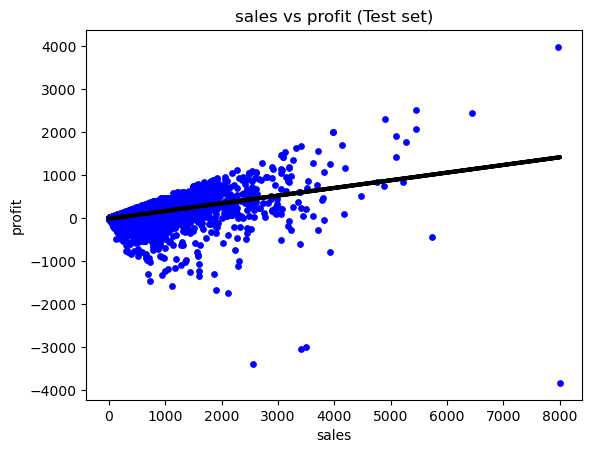

In [146]:
# Creating a line of best fit based on predicted values.
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='black', linewidth =3)
plot_test.title('sales vs profit (Test set)')
plot_test.xlabel('sales')
plot_test.ylabel('profit')
plot_test.show()

In [151]:
# Model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # this is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the r-squared value

In [154]:
# Summary statistics - evaluating the performance of the model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17832342]]
Mean squared error:  20942.230929192123
R2 score:  0.19258310998237338


The R2 is too low implying that sales alone arent capable of explaining the profits for global superstore. The line of best fit also leaves a lot more of the point above it, an indicator its unfitness.

Also, the high mean squared error shows that the model is weak and is not accurate as predicted values fall away from the actual values.

The slope of .18 shows that for every increase in sales, profits increase by a margin of 0.18. This shows a positive relationship.

In [163]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,12.4800,1.619074
1,228.6900,77.228203
2,12.4416,-10.863565
3,-24.2715,106.473244
4,38.9400,38.175375
5,-6.0660,8.752011
6,-47.8320,12.853449
7,224.2800,73.305088
8,-6.3920,-9.793625
9,-376.6932,70.630237


The disparity between actual and predicted values proves the weakness of the model as earlier highlighted.

#### Comparison of how the regression fits the training set

In [171]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [174]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [177]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17832342]]
Mean squared error:  24243.006845089112
R2 score:  0.24954059452567445


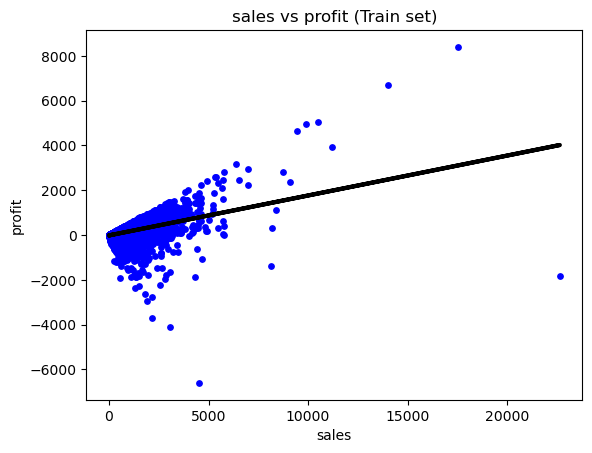

In [180]:
# Visualizing the line of best fit

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='black', linewidth =3)
plot_test.title('sales vs profit (Train set)')
plot_test.xlabel('sales')
plot_test.ylabel('profit')
plot_test.show()

The model is still weak and cannot be used to predict the effect of sales on profits for global superstore. Although r-squared increased to 24%, it still remains too low. Also, the mean squared error is too high furher proving the inadequacy of the model.

The basic bias in this analysis the use of one explanatory variable (sales) to explain profits where possibly the level of sales is a function of many other independent variables. It is imperative to remodel this rlationship include other independent variables.